In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, recall_score,precision_score, classification_report, confusion_matrix
import collections
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

np.random.seed(1337)  # for reproducibility

In [2]:

def load_dataset(file_train, file_test):
    
    df_train = pd.read_excel(file_train,header=None)
    
    df_train=df_train.sample(frac=1)

    X_train, Y_train = format_data(df_train)

    df_test = pd.read_excel(file_test,header=None)
    
    df_test=df_test.sample(frac=1)

    X_test, Y_test = format_data(df_test)

    return X_train, Y_train, X_test, Y_test


def format_data(df):
    
    X = np.array(df.drop(df.columns[-1], 1))


    Y = np.array(df[df.columns[-1]])

    
    Y=Y-1

    return X,Y


In [3]:
train_set_file = 'S11_trainset_P135_all.xls'


test_set_file = 'S11_cvset_P12345_20.xls'


X_train, Y_train, X_test, Y_test = load_dataset(train_set_file,test_set_file)

In [4]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(28368, 42)
(28368,)
(7040, 42)
(7040,)


In [48]:
no_of_classes=np.unique(Y_train).size
no_of_classes

8

In [2]:
X_train = np.load('X_train.npy') 

Y_train = np.load('Y_train.npy')

X_test = np.load('X_test.npy')

Y_test = np.load('Y_test.npy')

In [3]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# GridSearch

In [26]:
param_grid={'C': [0.1, 1, 10, 100, 1000],'gamma': ['scale','auto', 0.00001, 0.0001, 0.001,0.01,0.1,1,5]}

In [6]:
svm_clf=SVC(kernel='rbf')

In [28]:
grid_search = GridSearchCV(svm_clf, param_grid, scoring='accuracy', cv = 5, verbose=5,return_train_score=True)

In [29]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=0.1, gamma=scale, score=(train=0.997, test=0.995), total=  11.7s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   21.6s remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.997, test=0.996), total=  11.8s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   45.8s remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.997, test=0.996), total=  12.7s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.997, test=0.997), total=   9.7s
[CV] C=0.1, gamma=scale ..............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.5min remaining:    0.0s


[CV]  C=0.1, gamma=scale, score=(train=0.996, test=0.998), total=  13.0s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.997, test=0.995), total=  11.7s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.997, test=0.996), total=  10.0s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.997, test=0.996), total=  10.8s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.997, test=0.997), total=  14.3s
[CV] C=0.1, gamma=auto ...............................................
[CV]  C=0.1, gamma=auto, score=(train=0.996, test=0.998), total=  10.4s
[CV] C=0.1, gamma=1e-05 ..............................................
[CV]  C=0.1, gamma=1e-05, score=(train=0.126, test=0.126), total= 2.1min
[CV] C=0.1, gamma=1e-05 ............................................

[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed: 302.5min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5]},
             return_train_score=True, scoring='accuracy', verbose=5)

In [30]:
grid_search.best_score_

0.9995449438130434

In [31]:
grid_search.best_params_

{'C': 10, 'gamma': 'scale'}

# GridSearch: Fine tuning

In [11]:
param_grid={'C': [35+0.2*x for x in range(0, 76)],'gamma': ['scale']}

In [12]:
grid_search = GridSearchCV(svm_clf, param_grid, scoring='accuracy', cv = 5, verbose=5,return_train_score=True)

In [13]:
grid_search.fit(X_train,Y_train)

Fitting 5 folds for each of 76 candidates, totalling 380 fits
[CV] C=35.0, gamma=scale .............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=35.0, gamma=scale, score=(train=1.000, test=1.000), total=   6.5s
[CV] C=35.0, gamma=scale .............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    9.2s remaining:    0.0s


[CV]  C=35.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=35.0, gamma=scale .............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.5s remaining:    0.0s


[CV]  C=35.0, gamma=scale, score=(train=1.000, test=0.999), total=   3.6s
[CV] C=35.0, gamma=scale .............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   21.7s remaining:    0.0s


[CV]  C=35.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=35.0, gamma=scale .............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   27.7s remaining:    0.0s


[CV]  C=35.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=35.2, gamma=scale .............................................
[CV]  C=35.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=35.2, gamma=scale .............................................
[CV]  C=35.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=35.2, gamma=scale .............................................
[CV]  C=35.2, gamma=scale, score=(train=1.000, test=0.999), total=   3.6s
[CV] C=35.2, gamma=scale .............................................
[CV]  C=35.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=35.2, gamma=scale .............................................
[CV]  C=35.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=35.4, gamma=scale .............................................
[CV]  C=35.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=35.4, gamma=scale ...............................

[CV]  C=37.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.7s
[CV] C=37.4, gamma=scale .............................................
[CV]  C=37.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=37.4, gamma=scale .............................................
[CV]  C=37.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=37.4, gamma=scale .............................................
[CV]  C=37.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=37.6, gamma=scale .............................................
[CV]  C=37.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=37.6, gamma=scale .............................................
[CV]  C=37.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=37.6, gamma=scale .............................................
[CV]  C=37.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=37.6, gamma=scale ...............................

[CV]  C=39.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=39.6, gamma=scale .............................................
[CV]  C=39.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=39.8, gamma=scale .............................................
[CV]  C=39.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=39.8, gamma=scale .............................................
[CV]  C=39.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=39.8, gamma=scale .............................................
[CV]  C=39.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=39.8, gamma=scale .............................................
[CV]  C=39.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=39.8, gamma=scale .............................................
[CV]  C=39.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=40.0, gamma=scale ...............................

[CV]  C=42.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=42.0, gamma=scale .............................................
[CV]  C=42.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=42.0, gamma=scale .............................................
[CV]  C=42.0, gamma=scale, score=(train=1.000, test=1.000), total=   6.5s
[CV] C=42.0, gamma=scale .............................................
[CV]  C=42.0, gamma=scale, score=(train=1.000, test=1.000), total=   9.4s
[CV] C=42.0, gamma=scale .............................................
[CV]  C=42.0, gamma=scale, score=(train=1.000, test=1.000), total=   4.4s
[CV] C=42.2, gamma=scale .............................................
[CV]  C=42.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=42.2, gamma=scale .............................................
[CV]  C=42.2, gamma=scale, score=(train=1.000, test=1.000), total=   5.9s
[CV] C=42.2, gamma=scale ...............................

[CV]  C=44.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=44.2, gamma=scale .............................................
[CV]  C=44.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=44.2, gamma=scale .............................................
[CV]  C=44.2, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=44.4, gamma=scale .............................................
[CV]  C=44.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=44.4, gamma=scale .............................................
[CV]  C=44.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=44.4, gamma=scale .............................................
[CV]  C=44.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=44.4, gamma=scale .............................................
[CV]  C=44.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=44.4, gamma=scale ...............................

[CV]  C=46.4, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=46.6, gamma=scale .............................................
[CV]  C=46.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.4s
[CV] C=46.6, gamma=scale .............................................
[CV]  C=46.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=46.6, gamma=scale .............................................
[CV]  C=46.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=46.6, gamma=scale .............................................
[CV]  C=46.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=46.6, gamma=scale .............................................
[CV]  C=46.6, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=46.8, gamma=scale .............................................
[CV]  C=46.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.4s
[CV] C=46.8, gamma=scale ...............................

[CV]  C=48.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=48.8, gamma=scale .............................................
[CV]  C=48.8, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=48.8, gamma=scale .............................................
[CV]  C=48.8, gamma=scale, score=(train=1.000, test=1.000), total=   5.2s
[CV] C=48.8, gamma=scale .............................................
[CV]  C=48.8, gamma=scale, score=(train=1.000, test=1.000), total=   6.3s
[CV] C=49.0, gamma=scale .............................................
[CV]  C=49.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=49.0, gamma=scale .............................................
[CV]  C=49.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.6s
[CV] C=49.0, gamma=scale .............................................
[CV]  C=49.0, gamma=scale, score=(train=1.000, test=1.000), total=   3.5s
[CV] C=49.0, gamma=scale ...............................

[Parallel(n_jobs=1)]: Done 380 out of 380 | elapsed: 54.1min finished


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [35.0, 35.2, 35.4, 35.6, 35.8, 36.0, 36.2, 36.4,
                               36.6, 36.8, 37.0, 37.2, 37.4, 37.6, 37.8, 38.0,
                               38.2, 38.4, 38.6, 38.8, 39.0, 39.2, 39.4, 39.6,
                               39.8, 40.0, 40.2, 40.4, 40.6, 40.8, ...],
                         'gamma': ['scale']},
             return_train_score=True, scoring='accuracy', verbose=5)

In [14]:
grid_search.best_score_

0.9998237574903065

In [15]:
grid_search.best_params_

{'C': 35.4, 'gamma': 'scale'}

# Best Model evaluation

In [16]:
best_svm_clf = SVC(kernel = 'rbf', C = 35.4, gamma= 'scale', class_weight = 'balanced',probability=True)

In [17]:
best_svm_clf.fit(X_train, Y_train)

SVC(C=35.4, class_weight='balanced', probability=True)

In [18]:
Y_predict = best_svm_clf.predict(X_test)

In [19]:
accuracy_score(Y_test, Y_predict)

0.9231591058514136

In [13]:
print(classification_report(Y_test, Y_predict, digits=6))

              precision    recall  f1-score   support

           0   0.974031  0.999577  0.986639      2364
           1   0.999576  0.998308  0.998942      2364
           2   0.969244  0.986464  0.977778      2364
           3   0.984304  0.822335  0.896059      2364
           4   0.939936  0.999577  0.968840      2364
           5   0.805745  0.949239  0.871626      2364
           6   0.883146  0.831218  0.856396      2364
           7   1.000000  0.939086  0.968586      2364

    accuracy                       0.940725     18912
   macro avg   0.944498  0.940725  0.940608     18912
weighted avg   0.944498  0.940725  0.940608     18912



# The number of correctly classified samples in the test set

In [14]:
accuracy_score(Y_test, Y_predict, normalize=False)

17791

# Confusion Matrix

In [15]:
conf_mx=confusion_matrix(Y_test, Y_predict)

In [16]:
conf_mx

array([[2363,    0,    0,    1,    0,    0,    0,    0],
       [   0, 2360,    0,    0,    4,    0,    0,    0],
       [   3,    0, 2332,   28,    0,    1,    0,    0],
       [  60,    0,   73, 1944,    3,  144,  140,    0],
       [   0,    1,    0,    0, 2363,    0,    0,    0],
       [   0,    0,    0,    0,    0, 2244,  120,    0],
       [   0,    0,    1,    2,    0,  396, 1965,    0],
       [   0,    0,    0,    0,  144,    0,    0, 2220]], dtype=int64)

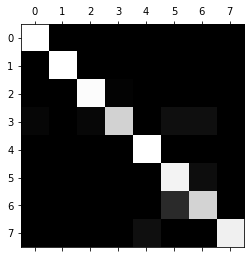

In [17]:
plt.matshow(conf_mx,cmap=plt.cm.gray)
plt.show()

# Classification Error plot

In [18]:
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums

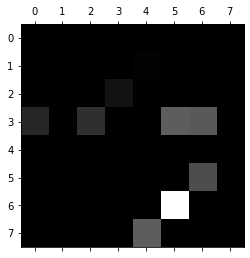

In [19]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

# Precision vs. Recall curve

In [24]:
Y_score = best_svm_clf.predict_proba(X_test)

In [27]:
Y_score[0:10]

array([[1.44709065e-07, 1.17460917e-07, 3.05324580e-07, 8.15330629e-08,
        2.36904447e-07, 1.43915236e-07, 1.16833391e-07, 9.99998853e-01],
       [3.92337082e-04, 7.26795906e-04, 3.46270723e-04, 2.70336581e-04,
        2.66442517e-01, 6.60997441e-04, 2.92597513e-04, 7.30868148e-01],
       [1.04590967e-03, 4.83008521e-01, 7.81519777e-04, 4.21224387e-04,
        5.06773564e-01, 2.47694947e-03, 3.24186883e-03, 2.25044339e-03],
       [1.21162675e-08, 4.26751768e-09, 7.92422003e-09, 7.31608453e-09,
        4.88494385e-09, 2.08329680e-08, 9.99981956e-01, 1.79863961e-05],
       [4.53156548e-08, 3.81880767e-08, 1.16357895e-07, 3.73400491e-08,
        7.00936683e-08, 6.18693545e-08, 3.57708132e-08, 9.99999595e-01],
       [3.11986099e-09, 1.67250538e-08, 7.17571112e-09, 9.38445819e-09,
        9.99965041e-01, 1.05301679e-05, 1.58302127e-05, 8.56213200e-06],
       [6.15381633e-05, 6.85520695e-05, 2.76198165e-03, 3.26546549e-04,
        8.64842574e-05, 4.40085598e-05, 9.94911094e-05, 9.

In [25]:
Y_test_bin= label_binarize(Y_test, classes=[*range(no_of_classes)])

range(0, 8)


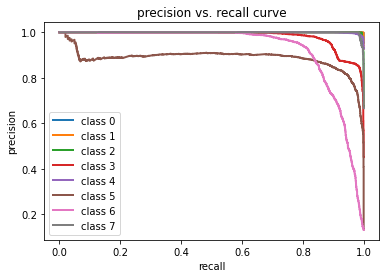

In [26]:
precision = dict()
recall = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test_bin[:,i],Y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

plt.xlabel("recall")
plt.ylabel("precision")
plt.legend(loc="best")
plt.title("precision vs. recall curve")
plt.show()

# ROC curve

range(0, 8)


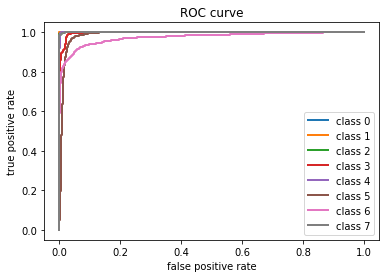

In [31]:
fpr = dict()
tpr = dict()
x=range(no_of_classes)
print(x)
for i in range(no_of_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test_bin[:, i],Y_score[:, i])
    plt.plot(fpr[i], tpr[i], lw=2, label='class {}'.format(i))

plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

# Saving model

In [20]:
import joblib


# save the model to disk
joblib.dump(best_svm_clf, 'svm_emg_clf.pkl')

['svm_emg_clf.pkl']

# Saving data

In [57]:
np.save('X_train', X_train) 

np.save('Y_train', Y_train) 

np.save('X_test', X_test) 

np.save('Y_test', Y_test) 

In [5]:
np.save('X_test2', X_test) 

np.save('Y_test2', Y_test) 

In [5]:
np.save('X_dev', X_test) 

np.save('Y_dev', Y_test) 